In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define paths
dataset_path = "/content/drive/MyDrive/Dataset"

# Data Augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load Training Data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Reshape images to 150x150
    batch_size=16,
    class_mode='binary',
    subset='training'
)

# Load Validation Data
validation_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    subset='validation'
)


Found 22 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam

# Build the model
model = Sequential()

# Add Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary Classification

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=validation_data,
    validation_steps=validation_data.samples // validation_data.batch_size,
    epochs=50  # You can change this based on your dataset size
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6667 - loss: 0.6640 - val_accuracy: 0.5000 - val_loss: 4.4380
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step - accuracy: 0.3750 - loss: 5.2400 - val_accuracy: 0.5000 - val_loss: 0.8498
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.8498
Epoch 4/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4375 - loss: 0.8110 - val_accuracy: 0.5000 - val_loss: 0.8716
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.5000 - loss: 0.8715 - val_accuracy: 0.5000 - val_loss: 0.7549
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7549
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step - accuracy: 0.3333 - loss: 1.0165 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step - accuracy: 0.6250 - loss: 0.6359 - val_accuracy: 0.5000 - val_loss: 0.6692
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6692
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6667 - loss: 0.6552 - val_accuracy: 0.5000 - val_loss: 0.6599
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6722 - val_accuracy: 0.5000 - val_loss: 0

In [ ]:
loss, accuracy = model.evaluate(validation_data)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 1.0000 - loss: 0.0846
Validation Accuracy: 100.00%


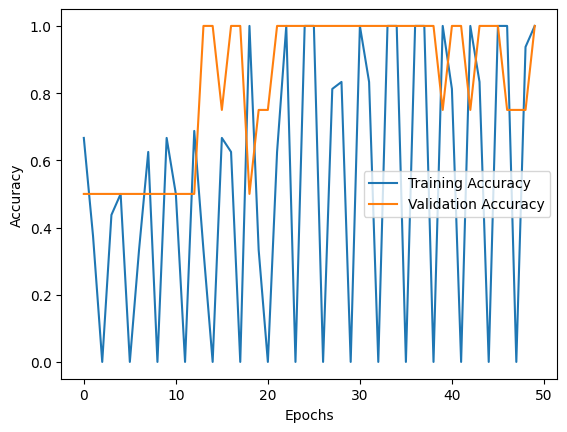

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(150, 150)):
    """Load and preprocess the image."""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


In [ ]:
import matplotlib.pyplot as plt

def predict_and_show_image(model, img_path):
    """Make a prediction and display the image with the prediction label."""
    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Make a prediction
    prediction = model.predict(img_array)
    label = "Fresh" if prediction < 0.5 else "Rotten"

    # Load the original image
    img = image.load_img(img_path)

    # Display the image
    plt.imshow(img)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


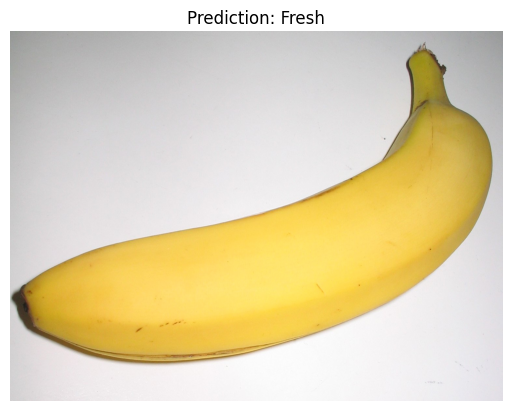

In [ ]:
# Test the function with a sample image
img_path = '/banana-1466183.jpg'  # Replace with your image path
predict_and_show_image(model, img_path)


In [ ]:
# After training your model
model.save('fruit_classification_model.h5')
